# NYU CUSP PUI2016
# Assignment 1 Homework 3

In [1]:
from __future__ import print_function
# __author__= 'skk456'

import pylab as pl
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. Chi-Sq Distribution

In [2]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']

In [3]:
seed(100)
mymean = 100
list1 = {}

In [4]:
df = mymean

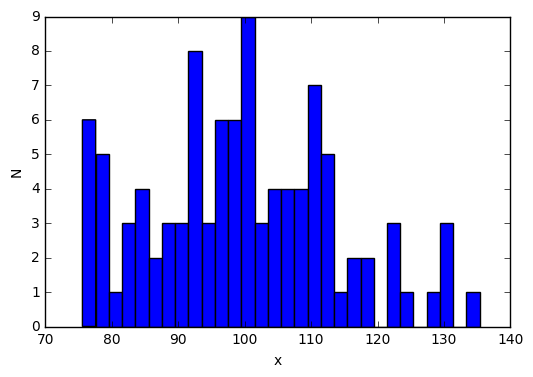

In [5]:
import numpy as np
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size = 100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution: df = 100, N=100

In [6]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 99.87, standard deviation: 14.07


In [7]:
# mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[211 411 989  28 701  25 320  73  60 111 169 627 438 830 239 190 711 858
 559 704 605 559 860 919 849 254 877 435 729 412 190 706 240 851 824 525
 386 590 137 808 965 779 239 867 808  63 231 589 137 678 992 285 760  46
 332 944 636 601 928 181  17 190 521 495 800 859 212 437 421  54   9 789
 275 717 421 143 192 313 805  12  49 566 686 726 479 367 839 454 321  92
  60  90 682 680 243 640  69 872 109 169] (100,)


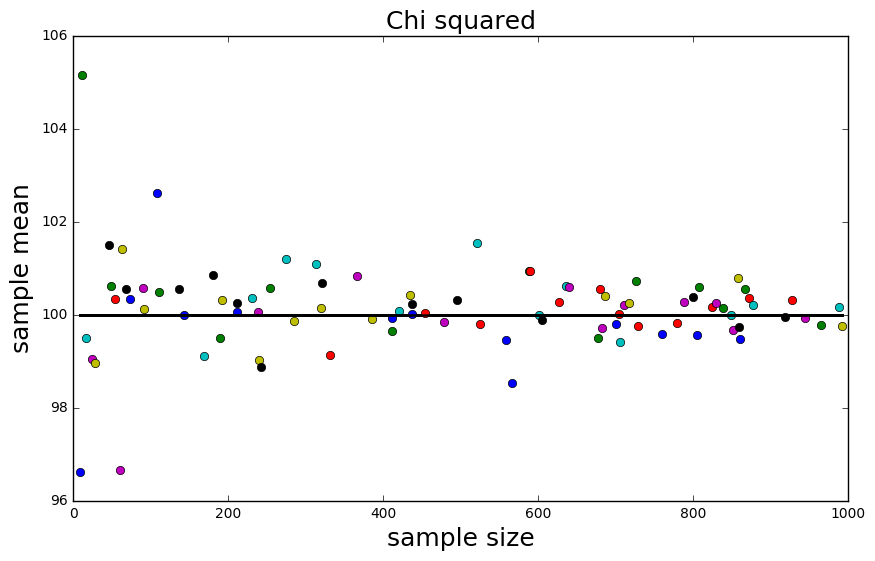

In [8]:
md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: The sample mean is close to 100.

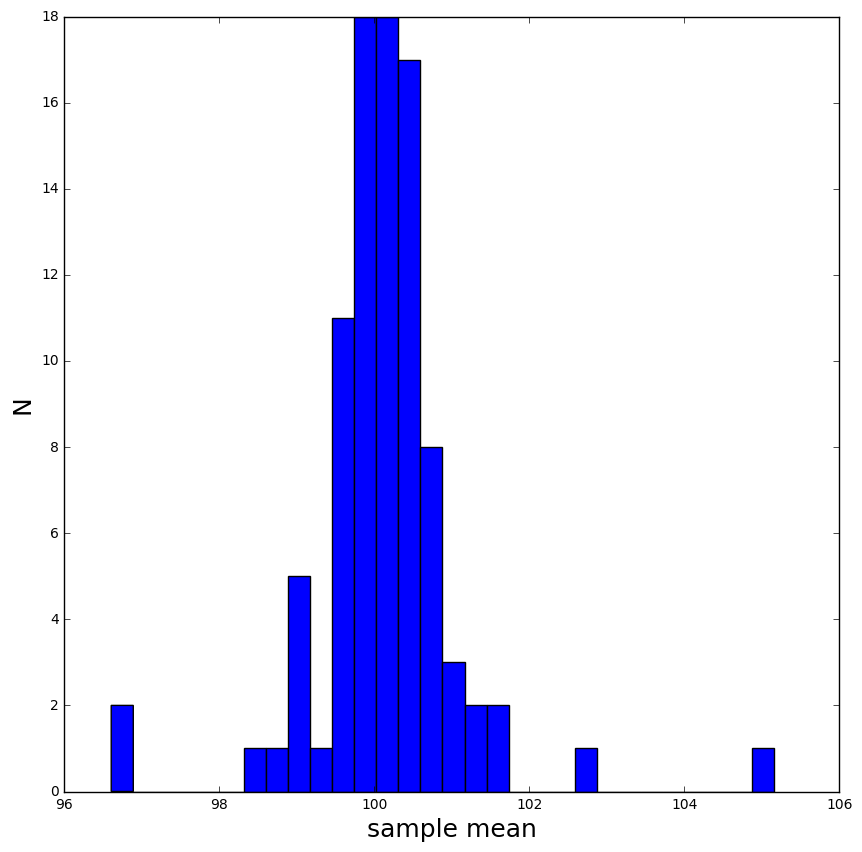

In [9]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans, bins = 30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 3: The distribution figure of sample means is close to 100 i.e. value of my mean variable and also close to the Normal Distribution.

# 2. Normal distribution


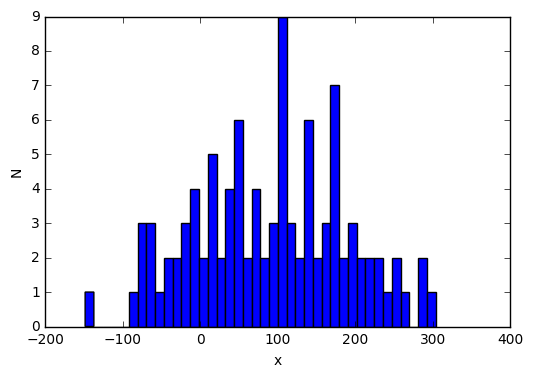

In [37]:
# N(mu, variance), mu = mean or expected, variance = sigma^2 i.e. (standard deviation)^2 
loc = mymean
seed(100)
list1['normal'] = {}
list1['normal'] = np.random.normal(loc, scale=100, size=100)
pl.hist(list1['normal'], bins = 40)
pl.ylabel('N')
pl.xlabel('x')

### Figure 4: Normal distribution - loc = mean = 100, scale = 100, N = 100

In [11]:
print ("Normal mean: %.2f, std deviation: %.2f"%(list1['normal'].mean(), list1['normal'].std()))

Normal mean: 89.58, std deviation: 96.98


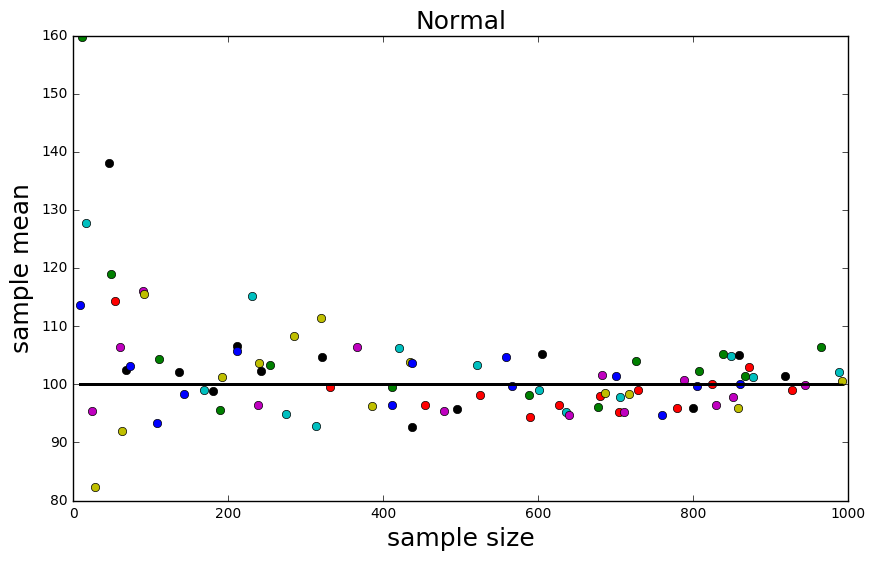

In [38]:
list1['normal'] = {} 
for n in mysize:
    list1['normal'][n] = np.random.normal(loc, scale = 100, size = n)

list1['normal']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in list1['normal']:
    if not type(nn) == str:
        list1['normal']['means'][nn] = list1['normal'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, list1['normal']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Normal', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [loc, loc], 'k')

### Figure 5 - The sample mean is close to 100 which is the mean of normal distribution.

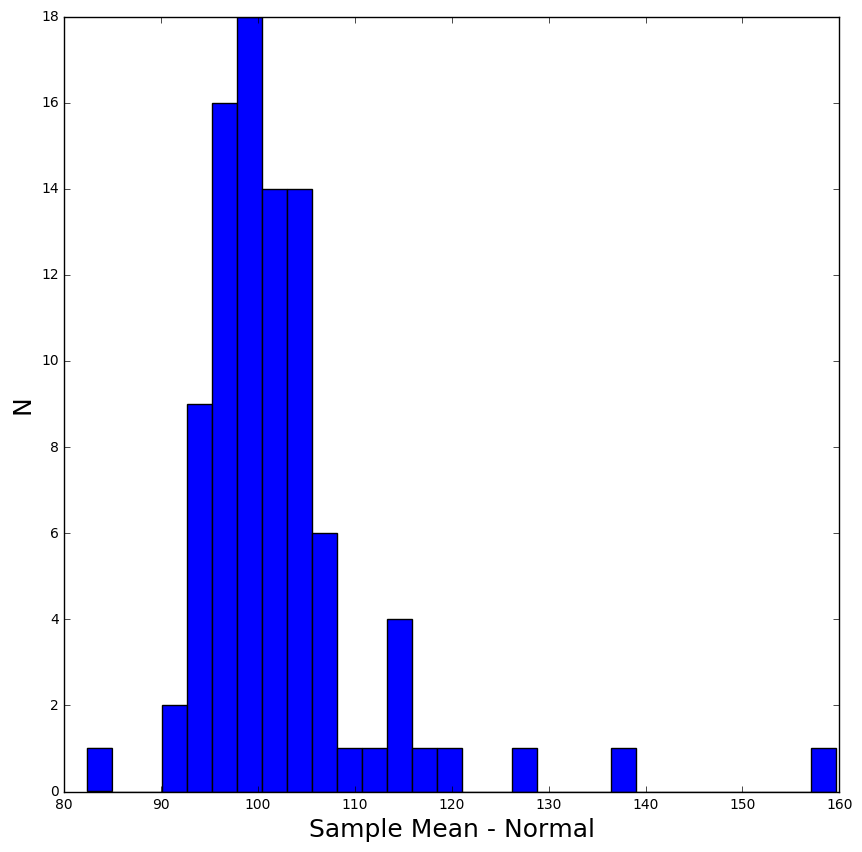

In [13]:
allmeans_nor = list(list1['normal']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_nor, bins = 30)
pl.xlabel('Sample Mean - Normal', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 6 - The distribution figure of sample means is closed to 100 and also close to a Normal Distribution

# 3. Poisson distribution

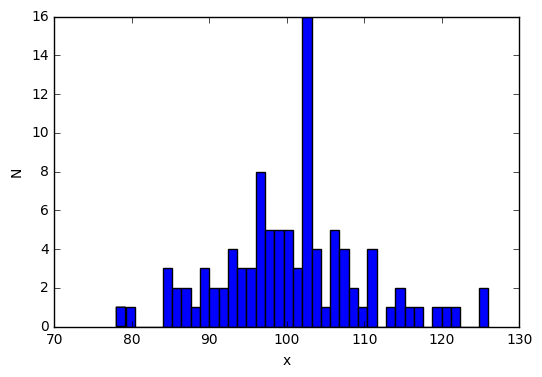

In [14]:
# Parameter: lam > 0, lam = Expected no. of occurences.
# In Poisson distribution, the lam equals to the mean
lam = mymean
list1['poisson'] = np.random.poisson(lam, size=100)
pl.hist(list1['poisson'], bins = 40)
pl.ylabel('N')
pl.xlabel('x')

### Figure 7 - Poisson distribution - lamda = 100, N = 100

In [17]:
print ("Poisson mean - %.2f, standard deviation: %.2f"%(list1['poisson'].mean(), list1['poisson'].std()))

Poisson mean - 100.56, standard deviation: 9.28


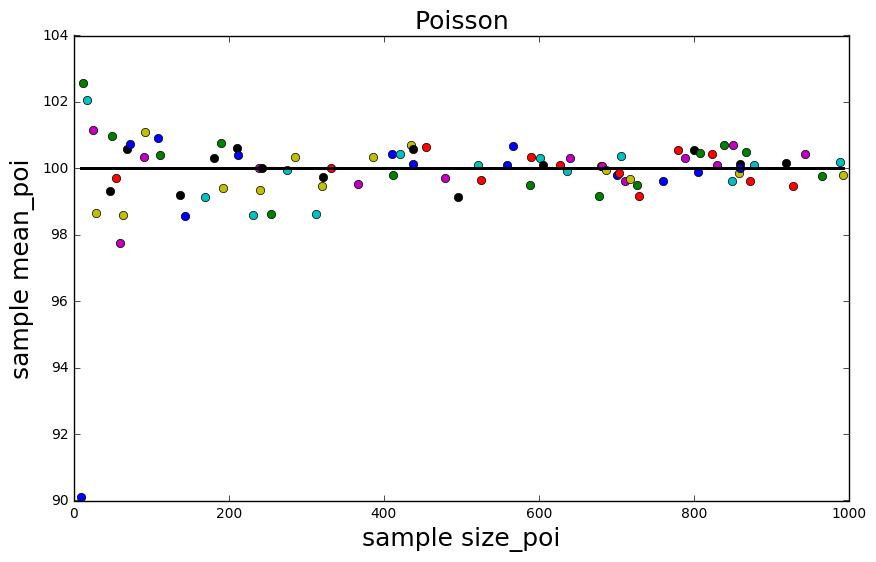

In [19]:
list1['poisson'] = {} 

for n in mysize:
    list1['poisson'][n] = np.random.poisson(lam, size = n)
       

list1['poisson']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in list1['poisson']:
    if not type(nn) == str:
        list1['poisson']['means'][nn] = list1['poisson'][nn].mean()
        
        axchisq_mu_n.plot(nn, list1['poisson']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Poisson', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [lam, lam], 'k')

### Figure 8 - The sample mean is close to 100 which is the mean of the poission distribution.

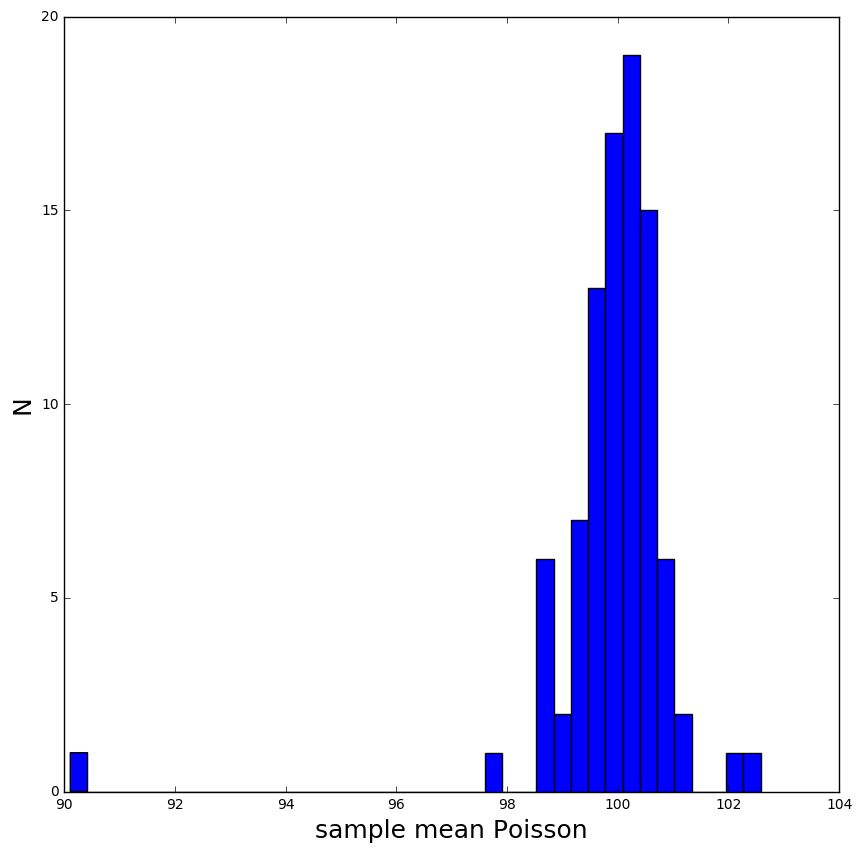

In [20]:
allmeans_poi = list(list1['poisson']['means'].values())

pl.figure(figsize = (10, 10))
pl.hist(allmeans_poi, bins=40)
pl.xlabel('sample mean Poisson', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 9 - The distribution figure of sample means is closed to 100 and also close to a Normal Distribution.

# 4. Binomial distribution

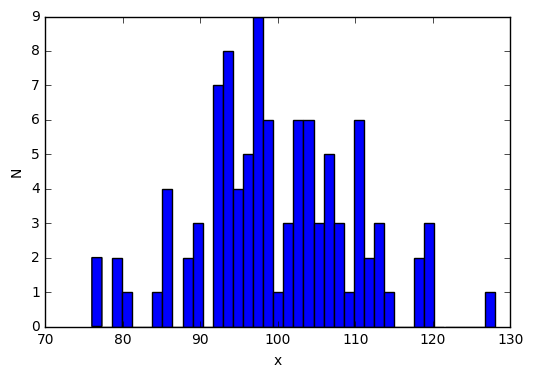

In [22]:
# B(n, p), n = number of trials, p = success probability in each trial.
n = 1000
p = 0.1
list1['binomial'] = np.random.binomial(n, p, size=100)
pl.hist(list1['binomial'], bins = 40)
pl.ylabel('N')
pl.xlabel('x')

### Fig 10 - Binomial Distribution, n=1000, p=0.1


In [24]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(list1['binomial'].mean(), list1['binomial'].std()))

Binomial mean: 99.73, standard deviation: 10.03


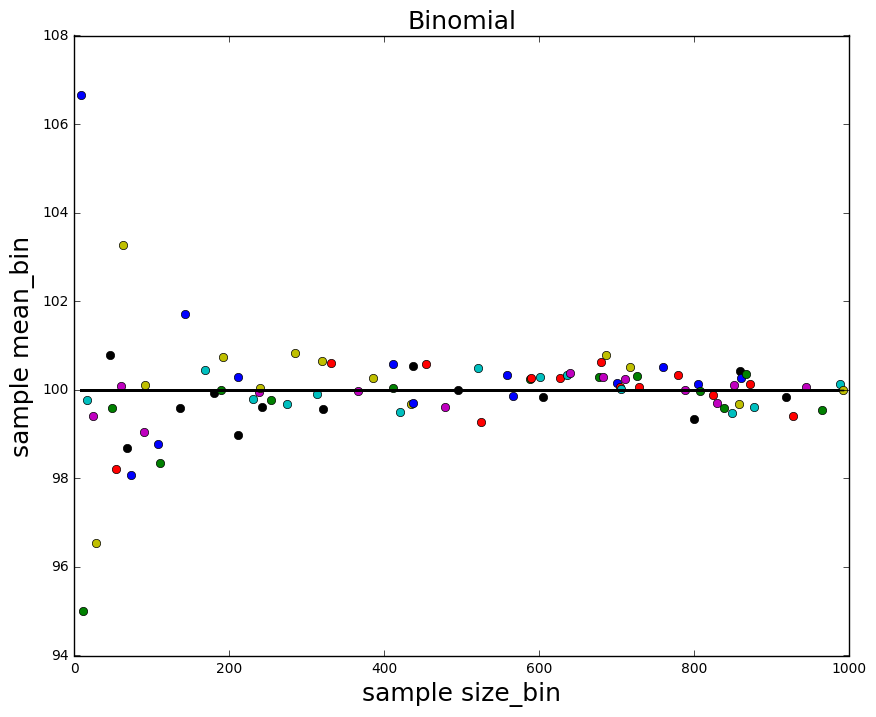

In [25]:
list1['binomial'] = {}
for x in mysize:
    list1['binomial'][x] = np.random.binomial(n, p, size = x)
       

list1['binomial']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,8)).add_subplot(111)

for ii in list1['binomial']:
    if not type(ii) == str:
        list1['binomial']['means'][ii] = list1['binomial'][ii].mean()
        
        axchisq_mu_n.plot(ii, list1['binomial']['means'][ii], 'o')
        axchisq_mu_n.set_xlabel('sample size_bin', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean_bin', fontsize=18)
        axchisq_mu_n.set_title('Binomial', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [n*p,n*p], 'k')

### Figure 11 - The sample mean is close to 100.


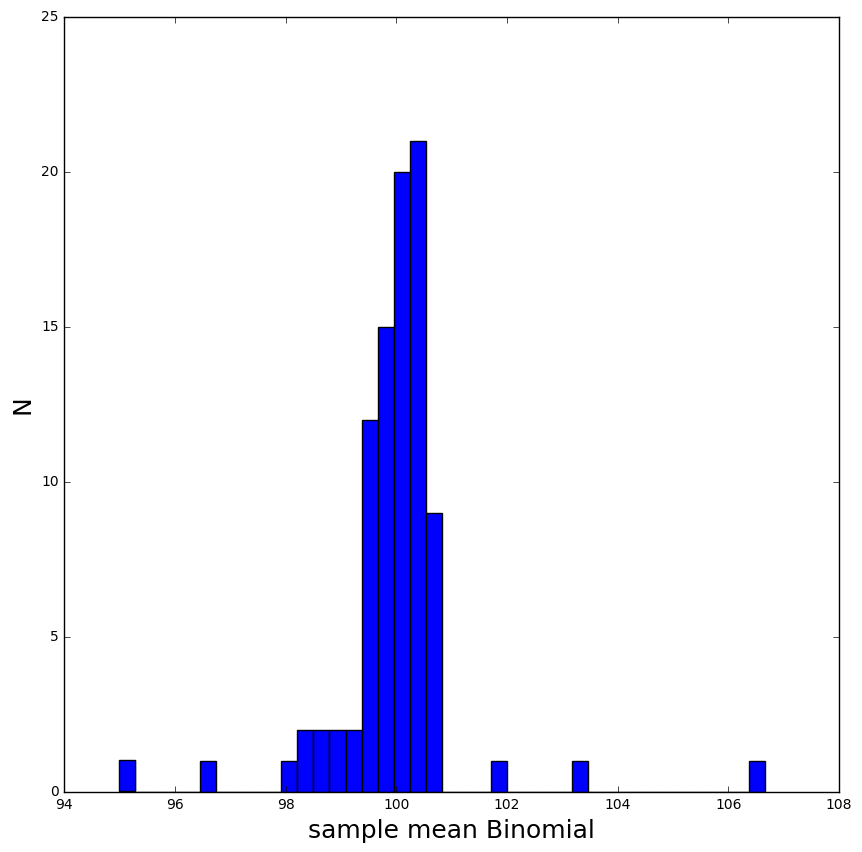

In [26]:
allmeans_bin = list(list1['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_bin,bins=40)
pl.xlabel('sample mean Binomial', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 12 - The distribution figure of sample means is 100 and it is also close to Normal Distribution

# 5. Fit a Gaussian to the Distribution of Means - Exponential Distribution

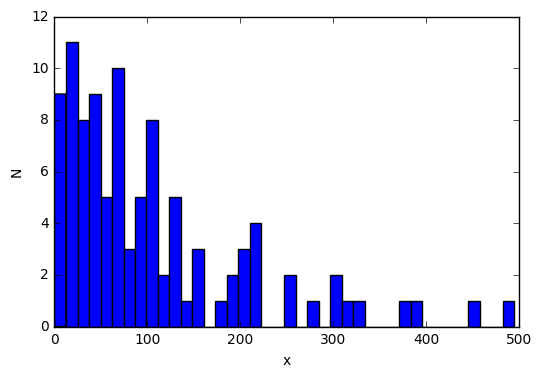

In [28]:
scale = mymean
list1['exponential'] = np.random.exponential(scale, size=100)
pl.hist(list1['exponential'], bins = 40)
pl.ylabel('N')
pl.xlabel('x')

### Figure 13 - Exponential Distribution, scale=100, size=100

In [29]:
print ("Exponential mean: %.2f, standard deviation: %.2f"%(list1['exponential'].mean(), list1['exponential'].std()))

Exponential mean: 106.27, standard deviation: 102.74


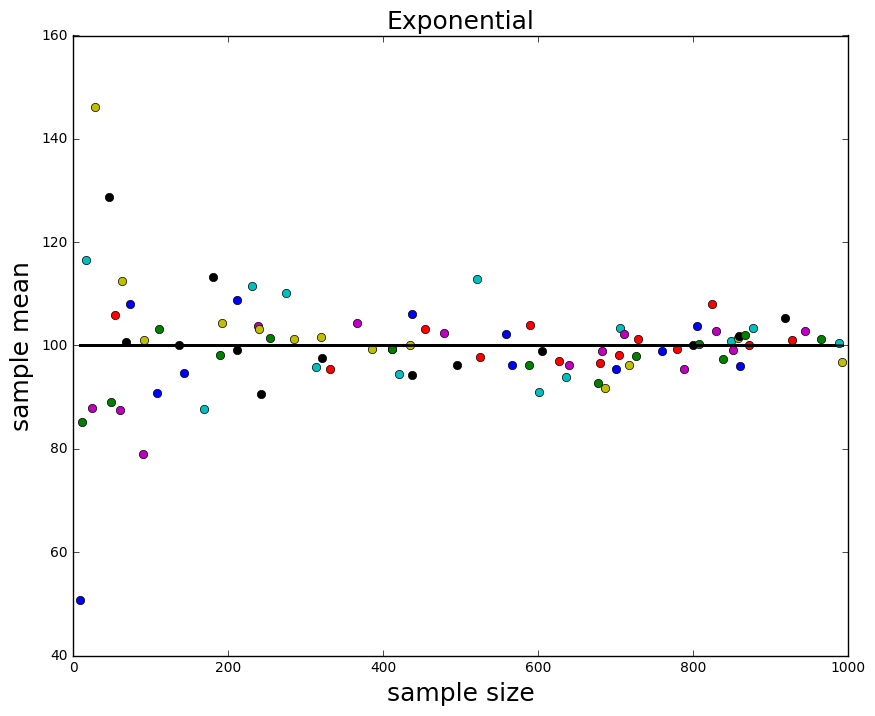

In [34]:
list1['exponential'] = {} 

for i in mysize:
    list1['exponential'][i] = np.random.exponential(scale, size = i)
       

list1['exponential']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,8)).add_subplot(111)

for ii in list1['exponential']:
    if not type(ii) == str:
        list1['exponential']['means'][ii] = list1['exponential'][ii].mean()
        axchisq_mu_n.plot(ii,list1['exponential']['means'][ii], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Exponential', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [scale,scale], 'k')

### Figure 2: The sample mean is close to 100 which is the mean of Exponential Distribution)

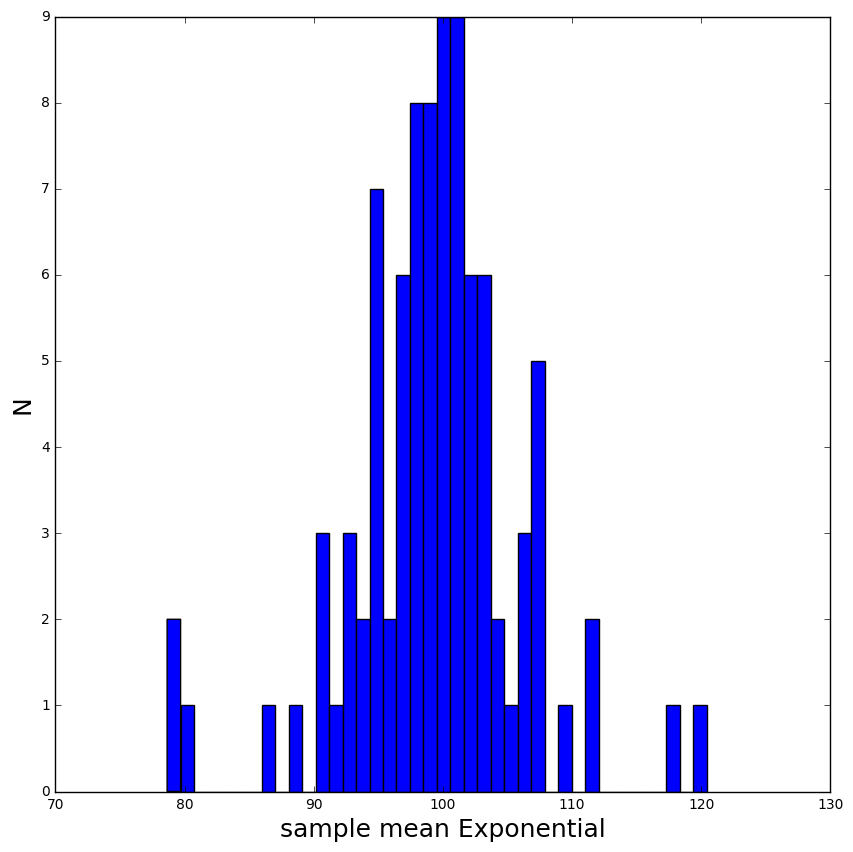

In [33]:
allmeans_ex = list(list1['exponential']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_ex, bins = 40)
pl.xlabel('sample mean Exponential', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 13 - The distribution figure of sample means is close to 100 and also close to a Normal Distribution